## 로지스틱 회귀(Logistic Regression) - 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- Sigmoid 함수

In [3]:
def sigmoid(x, a=1, b=0):
    return 1. / (1 + np.exp(-a * (x-b)))


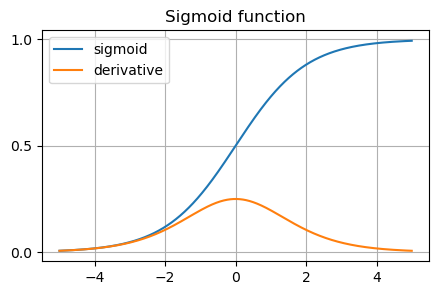

In [6]:
xs = np.linspace(-5, 5, 1001)
ys = sigmoid(xs)
plt.figure(figsize=(5,3))
plt.plot(xs,ys,label='sigmoid')
plt.plot(xs,ys*(1-ys), label='derivative')
plt.yticks([0,0.5,1])
plt.title('Sigmoid function')
plt.grid(),plt.legend()
plt.show()

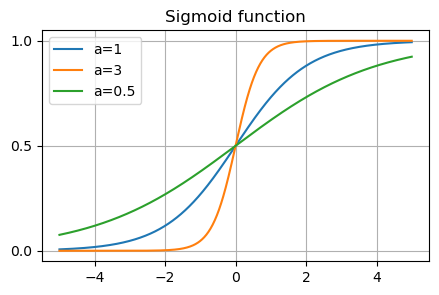

In [7]:
# a값에 따른 변화
xs = np.linspace(-5, 5, 1001)
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.figure(figsize=(5,3))
plt.plot(xs,ys,label='a=1')
plt.plot(xs,y3,label='a=3')
plt.plot(xs,y_half,label='a=0.5')

plt.yticks([0,0.5,1])
plt.title('Sigmoid function')
plt.grid(),plt.legend()
plt.show()

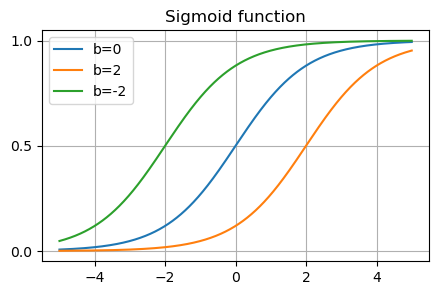

In [10]:
# b값에 따른 변화
xs = np.linspace(-5, 5, 1001)
y_plus2 = sigmoid(xs, b=2)
y_minus2 = sigmoid(xs, b=-2)
plt.figure(figsize=(5,3))
plt.plot(xs,ys,label='b=0')
plt.plot(xs,y_plus2,label='b=2')
plt.plot(xs,y_minus2,label='b=-2')

plt.yticks([0,0.5,1])
plt.title('Sigmoid function')
plt.grid(),plt.legend()
plt.show()

### 이진 분류

In [11]:
import pandas as pd
pima = pd.read_csv('../01.소개/pima-indians-diabetes.csv', skiprows=9, header=None)
pima.columns = ['P', 'G', 'BP', 'S', 'I', 'BMI', 'D', 'Age', 'Target']
pima.head()

,P,G,BP,S,I,BMI,D,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
X = pima.iloc[: , :-1].values
y = pima.Target.values

In [13]:
# 로지스틱 회귀를 사용하려면 데이터를 표준화/정규화해야 함
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)


In [14]:
# 데이터셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(
    X_std, y, stratify=y, test_size=0.2, random_state=2023
)

In [15]:
# 로지스틱 회귀 하이퍼 파라메터
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2023)
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2023,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [16]:
lrc.fit(X_train,y_train)
lrc.score(X_test,y_test)

0.7987012987012987

In [17]:
# 선형회귀의 가중치(계수)
lrc.coef_

array([[ 0.43899154,  1.10852013, -0.21920447,  0.0610045 , -0.21882506,
         0.67110797,  0.21628174,  0.13662499]])

In [18]:
# 선형회구의 바이어스(절편)
lrc.intercept_

array([-0.83697953])

In [19]:
X_test[0], y_test[0]

(array([-8.44885053e-01, -3.78365371e+00, -5.71502470e-02,  9.07269925e-01,
        -6.92890572e-01,  9.41978774e-04, -2.50296268e-01, -9.56461683e-01]),
 0)

In [20]:
# X_test[0]가 1이 될 확률, sigmoid 함수 적용 전 값
val = np.dot(lrc.coef_,X_test[0]) + lrc.intercept_
val

array([-5.36681519])

In [21]:
# sigmoid 함수 적용
sigmoid(val)

array([0.00464728])

In [22]:
lrc.predict_proba(X_test[:1])

array([[0.99535272, 0.00464728]])

#### 다중 분류

In [24]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [25]:
X_train, X_test,y_train, y_test = train_test_split(
    iris_std, iris.target, stratify=iris.target, test_size=0.2, random_state=2023
)

In [26]:
lrc = LogisticRegression(random_state=2023)
lrc.fit(X_train,y_train)
lrc.score(X_test,y_test)

0.9666666666666667

In [27]:
lrc.predict_proba(X_test[:1])

array([[3.30286696e-05, 7.71018326e-03, 9.92256788e-01]])

In [28]:
# weight, bias
lrc.coef_, lrc.intercept_

(array([[-1.04982073,  1.07867605, -1.77729719, -1.6588771 ],
        [ 0.58058167, -0.40675824, -0.39205087, -0.72718   ],
        [ 0.46923906, -0.67191782,  2.16934806,  2.38605711]]),
 array([-0.17112899,  1.8490486 , -1.67791961]))

In [29]:
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([-5.25442751,  0.19849377,  5.05593374])

In [30]:
# sigmoid 함수 적용
sigmoid(val)

array([0.00519718, 0.54946115, 0.99366892])

In [31]:
# softmax 함수
def softmax(x):
    return np.exp(x)  / np.sum(np.exp(x))

In [32]:
softmax(np.array([1,2,3]))

array([0.09003057, 0.24472847, 0.66524096])

In [33]:
# 다중 분류에서는 val에 softmax를 적용한 값이 predict_proba() 값
softmax(val)

array([3.30286696e-05, 7.71018326e-03, 9.92256788e-01])

In [34]:
lrc.predict_proba(X_test[:1])

array([[3.30286696e-05, 7.71018326e-03, 9.92256788e-01]])